<font size ='5'><b>Data Analysis Project</b></font><br>
<br>
Youssef M'rabet <br>
<br>




# Introduction

The following code explores and analyzes the given World Bank dataset in order introduce the region "Middle East and Russia" and finally identify one country that represents this region the best according to the data.


## Middle East & Russia

While the region assigned via the assignment is called "Middle East and Russia", the countries itself are generally classified to the "Central Asia" region including Turkmenistan and Uzbekistan. Other countries such as Bulgaria and Ukraine are more classified as part of "Eastern Europe". Nevertheless, most of these countries are located around the center between the broader regions of Asia, Europe, and the Middle East. These regions are well known globally, mostly for their political activities reported on the news. Terrorist have created a bad reputation for Middle East (Johnson, 1992). Iran, the only country from that region in our selection, have been known to support terrorist groups for years(Malakoutikhah, 2020). Vladimir Putin as the leader of the archenemy of the United States is the prominent keyword for Russia (Tismaneanu, 2016). These facts, also stereotypes for other countries, are covering beautiful cultures and significant monuments such as the Kremlin in Russia or the Shrine of Hazrat Ali in Afghanistan. For example, Pakistan is home to over 70 native languages (Gulwani, 2017), Uzbekistan harbors several UNESCO World heritages (Adams, 2010), and Bulgaria is the oldest country in Europe (Bell, 2019).

## Strategy for Analysis

To be able to provide a proper analysis of the dataset, we will follow several steps:<br>

1. Preparing the dataset<br>
- examining the underlying file given for this assignment<br>
- cleaning the dataset(s) (handling missing values, etc.)<br>
- preparing groupings to be compared (our regions, other regions)<br>

2. Analyzing with different objectives
- finding 1 representative country 
- finding 5 representative features
- analyzing a group of similar features 
The specific strategy for each objective is further explained in each analysis section (3.1-3.3)


# Dataset

## General Preparation

First, we will do some preparations before beginning to code an analysis of the dataset within the given excel file.<br>
We are going to:<br>
- import the necessary packages<br>
- analyze the file which sheets are available<br>
- examine the sheet contents<br>
- evaluate how useful these contents are for our analysis

### Importing Packages

In [1]:
# importing packages
import pandas            as pd  # data science essentials 
import numpy             as np  # mathmatical operation essentials
import matplotlib.pyplot as plt # data visualization essentials
import seaborn           as sns # enhanced data visualization

### Analyzing the Given File

In [2]:
# storing path to dataset (file given by course)
file_pathway = "Final_Project_Dataset.xlsx"

# finding sheets and their names 
xls    = pd.ExcelFile(file_pathway) # calling file path
sheets = xls.sheet_names            # calling sheet names
print(sheets)                       # printing all sheet names

['Data', 'Series - Metadata', 'Country - Metadata']


### Examining the Dataset

In [3]:
# reading dataset into python through pandas
dataset_pre = pd.read_excel(io = file_pathway,   # reading file location
                            sheet_name = "Data", # specifying sheet to load
                            header = 0,          # first line of the file are column names
                      
                            # set the country codes in first column as index 
                            index_col = 0)
# printing the sum of missing values in the whole dataset
print("All MVs within the Complete Dataset: ", dataset_pre.isnull().sum().sum())


All MVs within the Complete Dataset:  2297


In [4]:
# examining dataset for dtype, NAs, columns
##dataset_pre.info() 

# using ## to prevent from running and print unnecessary lines
# will use ## for the same purpose further on


<b>Observations</b>
- columns 1-2 are unnecessary (same values) --> to be dropped
- 'Reported cases of malaria' is not a ratio (will distort analysis if population different)
    - decision to just drop, 50+% are missing values

### Examining  Metadata

In [5]:
# looking into sheet 'Series - Metadata' within excel for useful data
# mainly looking for data that can be potentially help with data cleaning 
metadata_s = pd.read_excel(io         = file_pathway,        # reading file location
                           sheet_name = "Series - Metadata") # specifying sheet

##metadata_s.info() 
metadata_s.describe(include = object)

,Code,License Type,Indicator Name,Short definition,Long definition,Source,Topic,Dataset,Unit of measure,Periodicity,Aggregation method,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,Notes from original source,License URL
count,132,131,132,8,132,132,132,2,3,131,90,87,64,67,44,5,131
unique,132,3,132,8,109,45,28,1,1,1,5,63,38,35,26,3,3
top,SL.EMP.VULN.MA.ZS,CC BY-4.0,"Condom use, population ages 15-24, male (% of ...",Net official development assistance is disburs...,It is the average tariffs imposed by developed...,"International Labour Organization, ILOSTAT dat...",Economic Policy & Debt: Official development a...,International Debt Statistics,%,Annual,Weighted average,The employment to population ratio indicates h...,Breaking down employment information by status...,Data are drawn from labor force surveys and ho...,National estimates are also available in the W...,Estimates are presented with uncertainty inter...,https://datacatalog.worldbank.org/public-licen...
freq,1,127,1,1,6,12,19,2,3,131,81,6,9,9,6,3,127


<b>Observations</b><br>
- This dataset doesn't offer much valuable information for our analysis.

In [6]:
# looking into sheet 'Country - Metadata' within excel
metadata_c = pd.read_excel(io = file_pathway,                  # reading file location
                           sheet_name = "Country - Metadata")  # specifying sheet

##metadata_c.info()
metadata_c.head(2)

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",NaN,...,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2011,"Demographic and Health Survey, 2017/18",NaN,...,Enhanced General Data Dissemination System (e-...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,AL,AL,Albania,Albania


<b>Observations</b><br>
- This dataset contains valuable information about from what time/year the data originates.

In [7]:
#@ summarizing all columns with data about originating years

##metadata_t = metadata_c[['Long Name',\
##                         'Latest population census',\
##                         'Latest household survey',\
##                         'National accounts base year',\
##                         'PPP survey years',\
##                         'Latest agricultural census',\
##                         'Latest industrial data',\
##                         'Latest trade data']]
##years = []
##for string in ['Latest population census']:
##    years.append( int(if char.isdigit()))

# wanted to create a code to only have the years without strings in a table per country 
# skipping this task to optionally work on later

### Setting-Up the Dataset

In [8]:
# reading dataset into python through pandas
# renaming columns because they are too long 
dataset = pd.read_excel(io = file_pathway,   # reading file location
                        sheet_name = "Data", # specifying sheet to load
                        header = 0,          # first line of the file are column names
                        names = [
                            # renaming to the 3 first letters + _explanation
                            "cou_code",\
                            "cou",\
                            "reg",\
                            "reg_groups",\
                            "aid_death_est",\
                            "adj_enrol_rate",\
                            "ado_fert_rate",\
                            "cov_aviral",\
                            "cov_staff",\
                            "co2_pcap",\
                            "con_emp_f",\
                            "con_emp_m",\
                            "con_emp_t",\
                            "emp_f",\
                            "emp_m",\
                            "emp_t",\
                            "ene_gdp",\
                            "fer_rate",\
                            "gnp_employed",\
                            "gnp_energy",\
                            "gni_capita",\
                            "imm_measles",\
                            "imp_sanitation",\
                            "imp_water",\
                            "inc_tuberculosis",\
                            "inc_share",\
                            "int_user",\
                            "lif_exp",\
                            "lit_rate",\
                            "mat_death",\
                            "mob_subscribe",\
                            "mor_rate",\
                            "net_oda",\
                            "pop_t",\
                            "pov_gap",\
                            "pre_care",\
                            "pre_hiv",\
                            "pre_undernou",\
                            "pri_education",\
                            "pro_women",\
                            "rep_malaria",\
                            "sch_enrolled",\
                            "sel_employed",\
                            "tra_share",\
                            "tub_death"],\
                        # Set the country codes in first column as index 
                        index_col = 0)

## Cleaning Main Dataset

In [9]:
# initial check on column 'region' for irregularities (e.g. possible summarizing rows)
##dataset.reg.unique()

#@subseting dataset without summarizing row "World"
dataset_world = dataset.loc[:,:][dataset.loc[:,'reg'] != "World"] 
#@checking unique values 
dataset_world.reg.unique()

array(['Carribean Islands & Parts of Latin America ',
       'Middle East & Russia', 'Sub-Saharan Africa', 'Eastern Europe',
       'Arabian Peninsula', 'South America', 'Australia & Oceania',
       'Western Europe', 'East/South Africa', 'Central Asia',
       'North America & Part of Latin America', 'East/Southeast Asia',
       'Northern Sub-Saharan Africa'], dtype=object)

## Subsetting Dataset for Region: "Middle East & Russia"

### Applying Filter 

In [10]:
# We want to only look at the data set from Mirage
# filtering for "mirage" - assigned countries in middle east + russia region
mir_base = dataset.loc[:,:][dataset.loc[:,'reg'] == "Middle East & Russia"]

### Rough Display of the Dataset

In [11]:
# descriptive statistics on numeric columns
mir_base.describe(include = 'number').round(decimals = 2)

,aid_death_est,adj_enrol_rate,ado_fert_rate,cov_aviral,cov_staff,co2_pcap,con_emp_f,con_emp_m,con_emp_t,emp_f,...,pre_care,pre_hiv,pre_undernou,pri_education,pro_women,rep_malaria,sch_enrolled,sel_employed,tra_share,tub_death
count,11.00,9.00,14.00,12.00,12.00,14.00,14.00,14.00,14.00,14.00,...,2.00,12.00,14.00,12.00,13.00,6.00,9.00,14.00,14.00,14.00
mean,1915.45,89.96,38.09,12.75,88.12,5.00,22.24,9.38,12.90,40.90,...,46.00,0.25,8.29,93.03,15.78,32390.33,88.15,38.68,84.46,13.42
std,4399.73,8.26,23.03,18.21,26.85,3.76,22.48,9.56,12.08,15.14,...,14.14,0.26,7.57,10.03,8.83,47570.60,7.57,22.96,31.51,10.86
min,100.00,71.67,17.99,2.00,24.00,0.15,0.11,0.15,0.14,12.88,...,36.00,0.10,2.50,63.94,2.80,6.00,71.67,3.69,35.59,0.73
25%,200.00,87.93,27.06,3.00,99.05,1.48,1.88,1.01,1.41,38.65,...,41.00,0.10,2.52,91.63,8.40,23.25,87.48,28.59,58.13,5.80
50%,200.00,90.99,30.25,5.50,99.60,4.62,16.31,5.58,8.85,45.67,...,46.00,0.15,5.50,95.01,14.00,4210.50,88.40,31.59,83.36,9.75
75%,1135.00,94.80,41.24,13.00,99.90,6.76,33.42,18.99,27.24,50.06,...,51.00,0.23,9.38,97.62,21.80,63267.75,92.42,60.39,103.78,18.00
max,15000.00,99.67,111.14,67.00,100.00,12.01,64.97,26.06,28.86,59.19,...,56.00,1.00,24.60,105.79,31.80,104334.00,98.05,72.32,134.42,40.00


### Examining Missing Values per Feature

In [12]:
# checking columns for missing values
mir_mvcount  = mir_base.isnull().sum(axis = 0)
mir_mvcount2 = mir_mvcount.to_frame()
##mir_mvcount2

# trying to display only features with more than 7 MVs
# mir_better = mir_mvcount2.drop([mir_mvcount[index] < 7].index, inplace = True)

<b>Observations</b><br>
Following features have more than 10 MVs:</br>
- Literacy rate, adult total (% of people ages 15 and above)
- Poverty gap at national poverty lines (%)
- Pregnant women receiving prenatal care (%)

### Examining Missing Values per Country

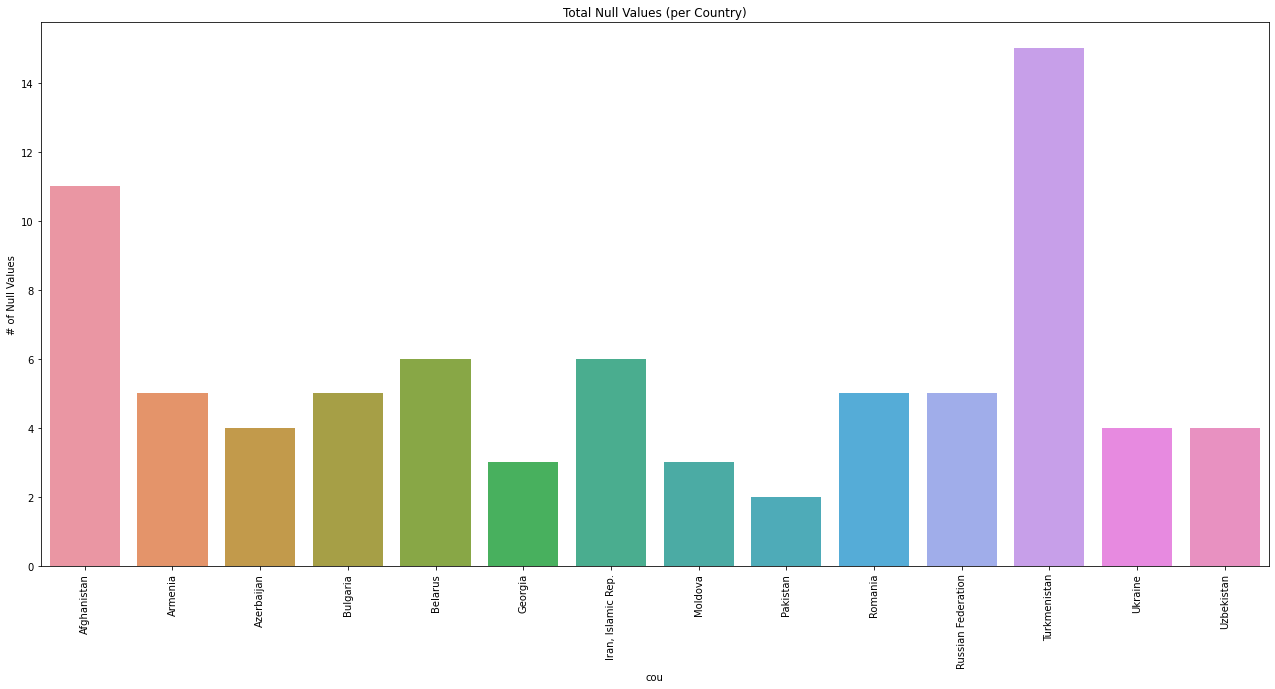

In [13]:
# sum all columns' null values for each country
cou_nu = mir_base.isnull().sum(axis = 1) 
cou_nu

# set graph size
f,axarray = plt.subplots(1,1,figsize=(22,10))

# create barplot graph
sns.barplot(data = mir_base, x = mir_base['cou'], y = cou_nu) 

# create a title for graph,xlabel, and ylabel
plt.title('Total Null Values (per Country)') # inserting title
plt.ylabel('# of Null Values')               # inserting y-axis label
plt.xticks(rotation = 'vertical')

# display the plot with plt.show()
plt.show()

<b>Observations</b><br>
- Afghanistan and Turkmenistan have comparably too many missing values in the dataset
- Both countries will be removed from further analysis of the "Middle East & Russia" region

## Clean Dataset

### Drop Unnecessary Rows

In [14]:
# check all index labels
print("Index Labels Before Dropping Rows:")
for row in mir_base.index: # using a for loop to print all index labels
    print(row, end = " ")  # print each index label

# drop countries afghanistan and turkmenistan as decided in 2.3.4
mir_droprow = mir_base.drop(index = ['AFG','TKM'])

print("\n") # creating space between prints

#check index labels after dropping rows
print("Index Labels After Dropping Rows:")
for row in mir_droprow.index: # using a for loop to print all index labels
    print(row, end = " ")     # print each index label

Index Labels Before Dropping Rows:
AFG ARM AZE BGR BLR GEO IRN MDA PAK ROU RUS TKM UKR UZB 

Index Labels After Dropping Rows:
ARM AZE BGR BLR GEO IRN MDA PAK ROU RUS UKR UZB 

### Drop Unnecessary Columns

In [15]:
# clean dataset (drop unnecessary columns)

# check missing valule count in columns
##print(mir_mvcount)

# drop columns with dtype object that are unnecessary for identification:
mir_dropped = mir_droprow.drop(columns = ['reg',\
                                          'reg_groups',\
# drop columns with less than 30% of data:
                                          'lit_rate',\
                                          'pov_gap',\
                                          'pre_care',\
# drop columns with 30-70% of data:
                                          'sch_enrolled',\
                                          'inc_share',\
                                          'rep_malaria',\
                                          'adj_enrol_rate'])
# check if columns dropped
##mir_dropped.info()

# count MVs in rows
mir_dropped.count(axis=1) 

cou_code
ARM    35
AZE    35
BGR    34
BLR    35
GEO    35
IRN    34
MDA    35
PAK    35
ROU    34
RUS    33
UKR    35
UZB    35
dtype: int64

### Impute Missing Values

In [16]:
# remove outliers for each column outside one standard deviation
def remove_outlier(nums):
    """
    This function is created to remove outliers accouring to a distance from the mean
    that can be set in "not_outlier"
    """
    mean = np.mean(nums)
    std = np.std(nums)
    distance_from_mean = abs(nums - mean)

    # find the not extreme value by comparing distance from mean(array) with 3*std value
    not_outlier = distance_from_mean < 3*std

    # not_outlier (bool array) is used for indexing
    no_outliers = nums[not_outlier]
    return no_outliers

# imputing MVs with fillna
def replace_outlier(df):
    """
    This function adds onto the remove_outlier function by filling the MVs
    with the mean after the outliers are removed in the hope of making the 
    filling values more accurate by not being influenced by outliers
    """
    # copy dataframe
    mir_dropped = df.copy()
    
    # iterate columns that are only numbers
    for col in mir_dropped.describe(include = 'number').round(decimals = 2).columns:
        df_column = mir_dropped[col] 
        new_list = [] 
        
        # iternate both zip bool list and column list 
        for bool_val, val in zip(df_column.isna().tolist(),df_column.tolist()):
            # if the element in the column is not NaN or blank
            if not bool_val:
                new_list.append(val)
        new_list = np.array(new_list)
        
        # pass list of non-NaN column elements to remove_outlier function
        no_outliers = remove_outlier(new_list)
        
        # fill NaN rows with mean value of elements w/o outlier removal
        mir_dropped[col] = mir_dropped[col].fillna(np.mean(no_outliers))
    return mir_dropped

# assigning to new dataframe mir_filled
mir_filled = replace_outlier(mir_dropped) # creating new dataframe 

# testing if MVs are filled
##mir_filled.info()
mir_filled.head().round(2)

,cou,aid_death_est,ado_fert_rate,cov_aviral,cov_staff,co2_pcap,con_emp_f,con_emp_m,con_emp_t,emp_f,...,mor_rate,net_oda,pop_t,pre_hiv,pre_undernou,pri_education,pro_women,sel_employed,tra_share,tub_death
cou_code,,,,,,,,,,,,,,,,,,,,,
ARM,Armenia,200.0,27.67,3.0,99.9,1.91,34.19,16.97,24.76,38.23,...,17.8,104.68,2908220,0.2,5.2,105.79,8.4,50.20,55.70,8.8
AZE,Azerbaijan,200.0,40.58,4.0,98.0,4.05,31.11,26.06,28.63,59.19,...,36.8,26.77,8763400,0.1,2.6,90.74,11.4,69.73,89.24,4.7
BGR,Bulgaria,100.0,43.98,20.0,99.6,6.77,1.52,0.59,1.01,46.03,...,9.6,53.07,7492561,0.1,5.8,95.10,21.7,12.47,124.84,3.2
BLR,Belarus,100.0,21.91,19.0,99.9,6.62,0.17,0.15,0.16,56.19,...,5.0,11.66,9527985,0.1,2.5,98.55,31.8,3.69,129.60,10.0
GEO,Georgia,200.0,50.93,11.0,99.6,1.28,37.87,19.66,28.07,45.62,...,17.2,220.34,4030000,0.2,6.9,95.59,6.0,64.25,87.02,5.1


## Finalizing the Dataset

We are renaming the cleaned dataset to 'mir' for easier usage further on. 
Final check whether everything is in order.

In [17]:
# renaming cleaned dataset to the final ver. 'mir' and
# round to 2 decimal places
mir = mir_filled.round(2)

# final check of dataset mir (testing top 5 rows)
mir.head()

,cou,aid_death_est,ado_fert_rate,cov_aviral,cov_staff,co2_pcap,con_emp_f,con_emp_m,con_emp_t,emp_f,...,mor_rate,net_oda,pop_t,pre_hiv,pre_undernou,pri_education,pro_women,sel_employed,tra_share,tub_death
cou_code,,,,,,,,,,,,,,,,,,,,,
ARM,Armenia,200.0,27.67,3.0,99.9,1.91,34.19,16.97,24.76,38.23,...,17.8,104.68,2908220,0.2,5.2,105.79,8.4,50.20,55.70,8.8
AZE,Azerbaijan,200.0,40.58,4.0,98.0,4.05,31.11,26.06,28.63,59.19,...,36.8,26.77,8763400,0.1,2.6,90.74,11.4,69.73,89.24,4.7
BGR,Bulgaria,100.0,43.98,20.0,99.6,6.77,1.52,0.59,1.01,46.03,...,9.6,53.07,7492561,0.1,5.8,95.10,21.7,12.47,124.84,3.2
BLR,Belarus,100.0,21.91,19.0,99.9,6.62,0.17,0.15,0.16,56.19,...,5.0,11.66,9527985,0.1,2.5,98.55,31.8,3.69,129.60,10.0
GEO,Georgia,200.0,50.93,11.0,99.6,1.28,37.87,19.66,28.07,45.62,...,17.2,220.34,4030000,0.2,6.9,95.59,6.0,64.25,87.02,5.1


# Analysis

We are dividing the analysis into several parts with different objectives:<br>
- Find 1 representative country using the arithmetic mean for features<br>
- Find 5 representative features that best represent the region<br>
- Find 1 category with features that are significant for this region<br>
    

## Representative Country by Data

To find a representative country for our region, we try to find the country that is closest to the median of all features in our dataset. To best represent our region, we compute and remove outliers from the dataset and compare the values from each country.

### Analysis

In [18]:
# use calculated function: outlier = (A- A(mean)) > 3*std 
# we hypothesis value over 3 standard deviation is outliers
# use pandas.DataFrame.mask() to cover up outlier which we dropped
# use dropna() to drop extreme outliers
# reducing factor for std until we have one country left
mir_dropped.mask((mir_dropped - mir_dropped.mean()).abs() > 1.5 * mir_dropped.std()).dropna()

,cou,aid_death_est,ado_fert_rate,cov_aviral,cov_staff,co2_pcap,con_emp_f,con_emp_m,con_emp_t,emp_f,...,mor_rate,net_oda,pop_t,pre_hiv,pre_undernou,pri_education,pro_women,sel_employed,tra_share,tub_death
cou_code,,,,,,,,,,,,,,,,,,,,,
ARM,Armenia,200.0,27.671,3.0,99.9,1.911538,34.188,16.972,24.757,38.234001,...,17.8,104.679151,2908220.0,0.2,5.2,105.790024,8.4,50.202,55.702862,8.8


## Representative 5 Features

In this analysis, we are comparing our region to all other regions for each feature.<br>
The 5 features that show a significance will be selected.

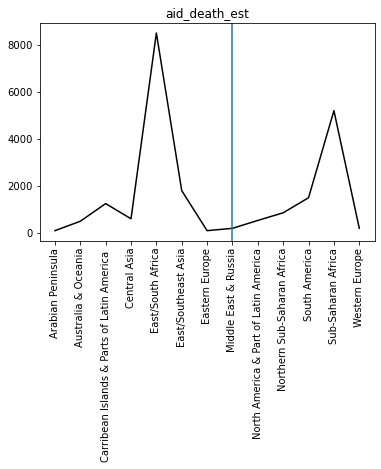

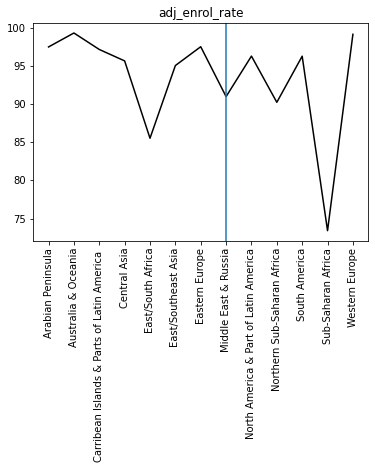

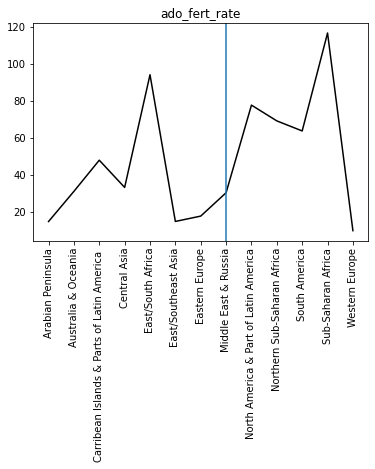

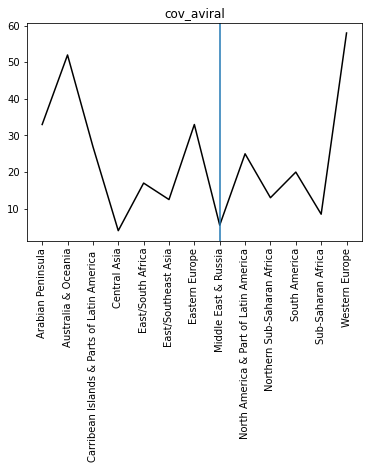

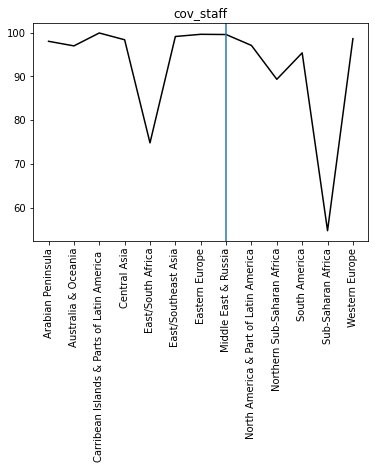

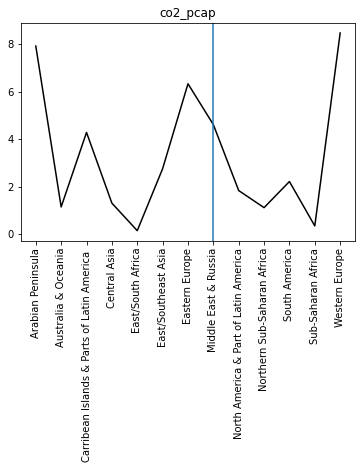

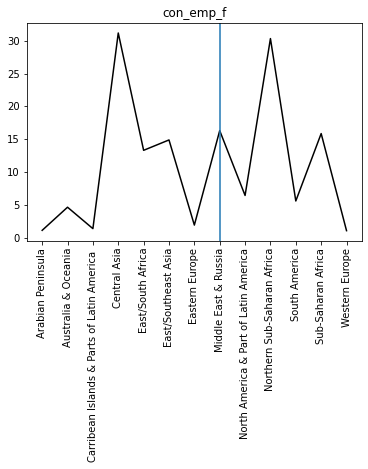

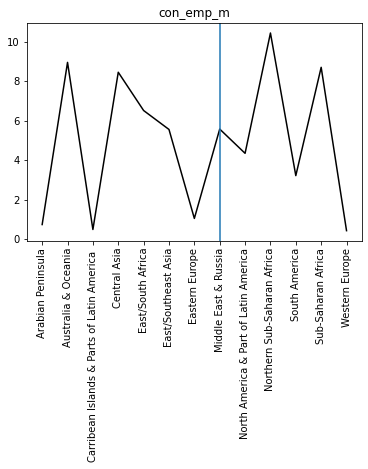

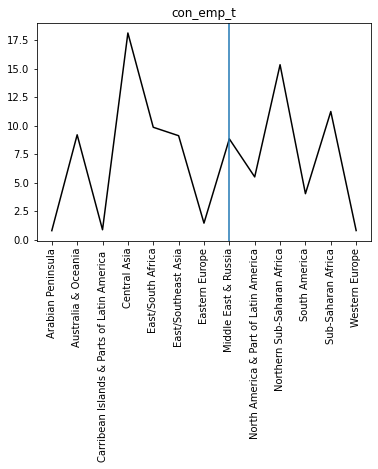

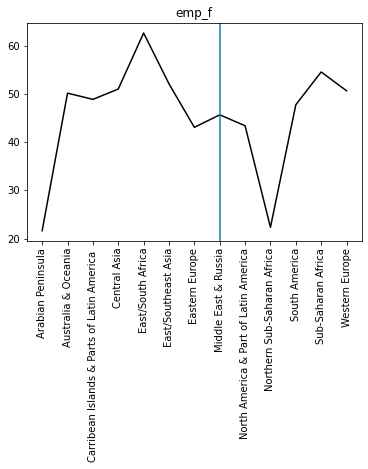

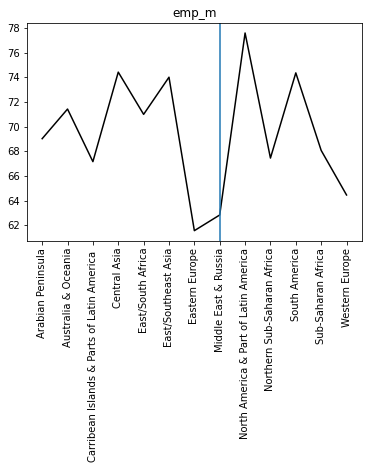

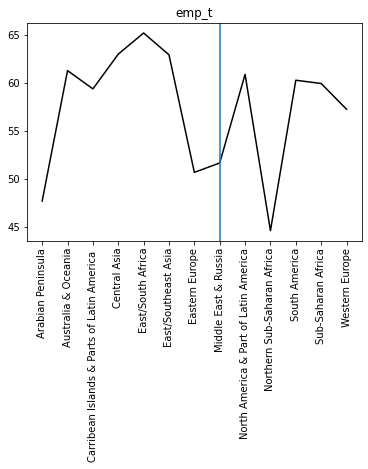

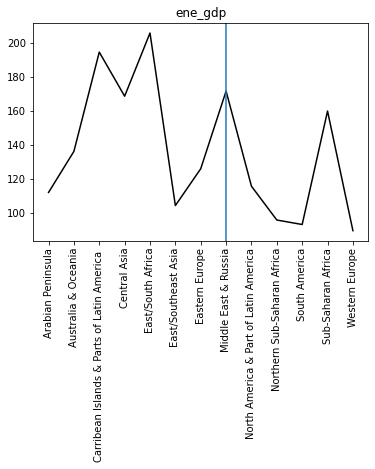

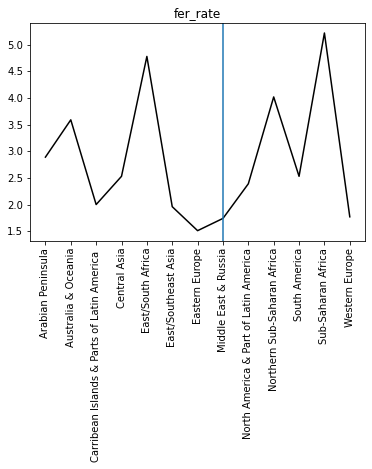

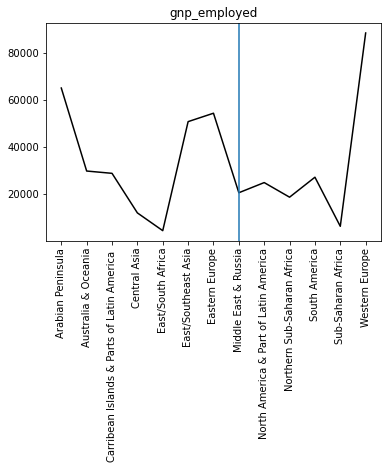

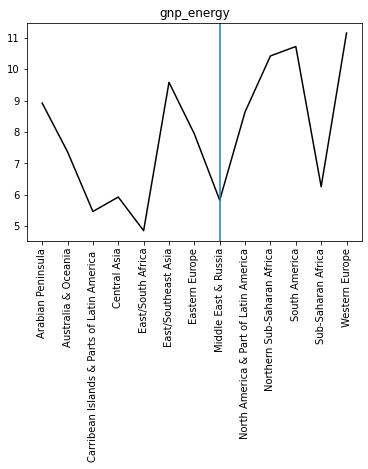

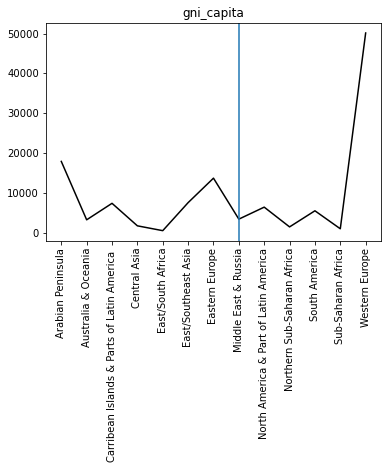

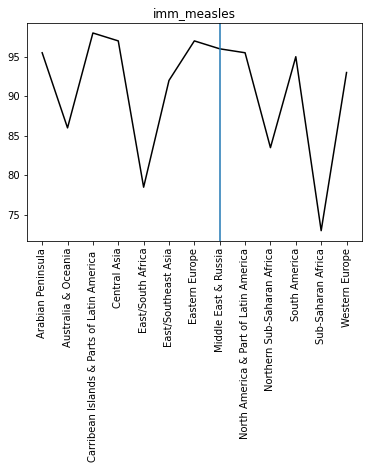

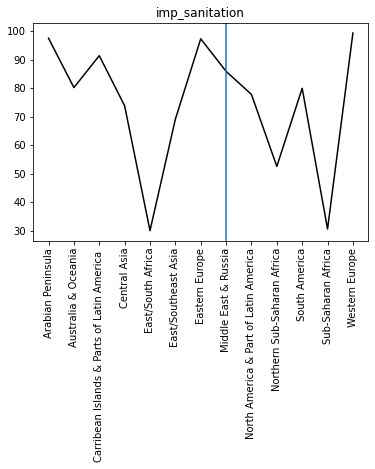

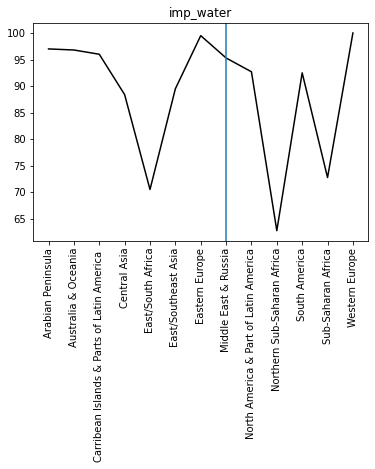

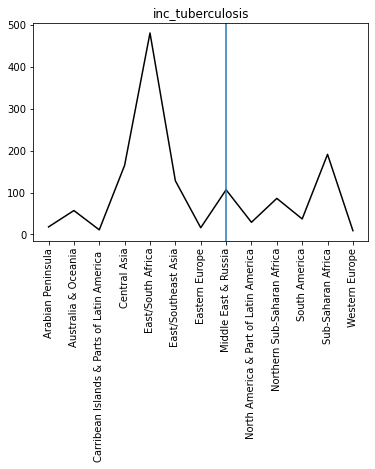

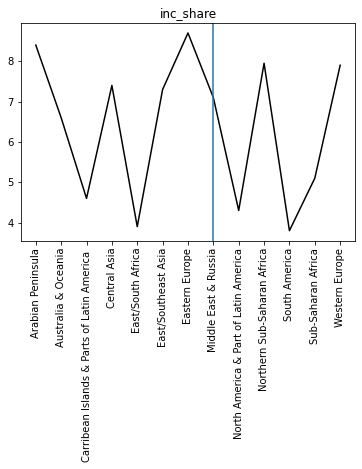

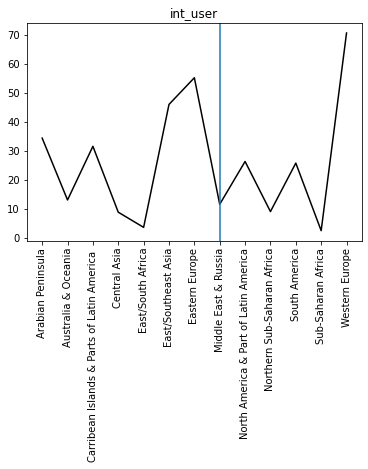

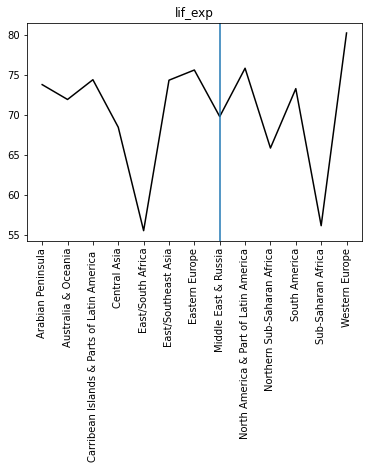

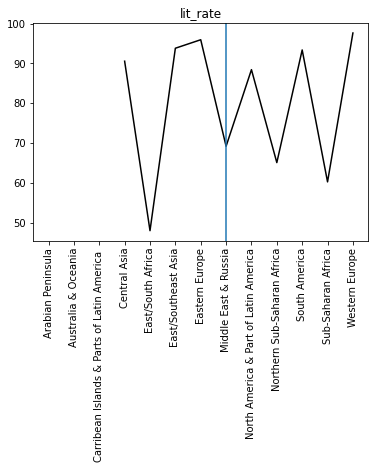

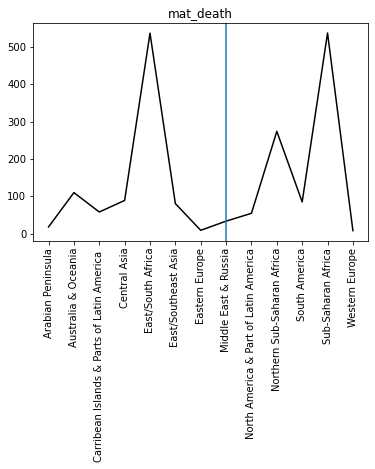

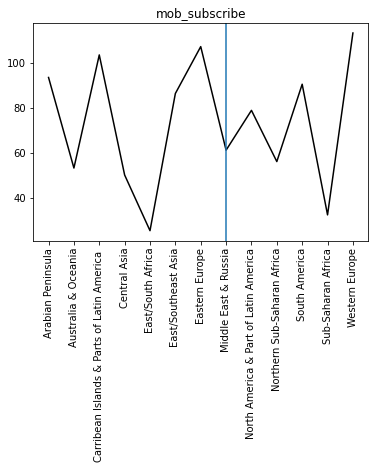

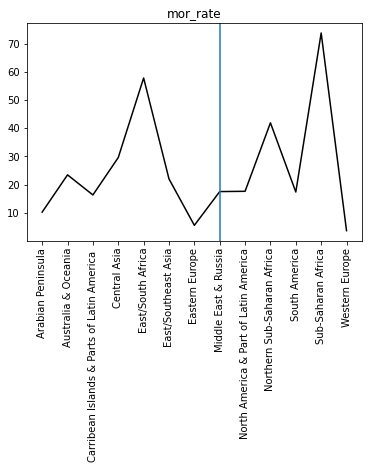

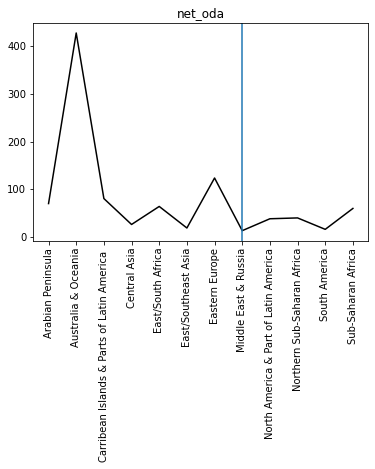

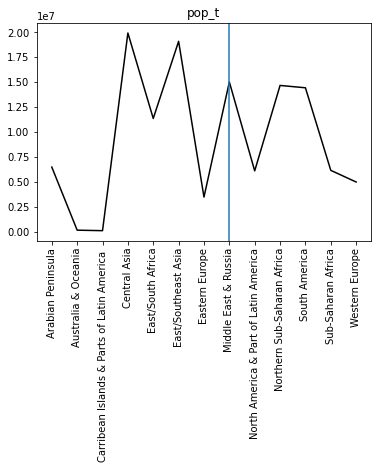

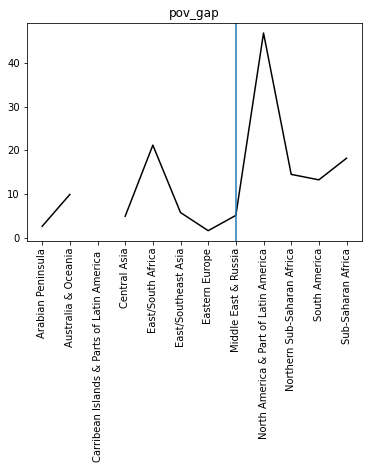

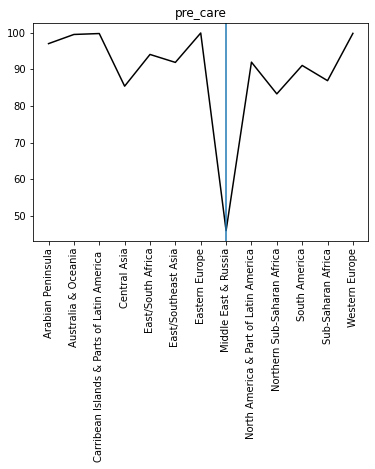

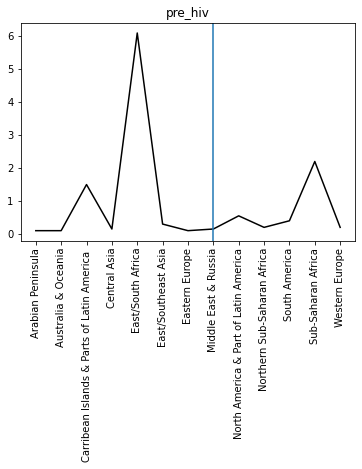

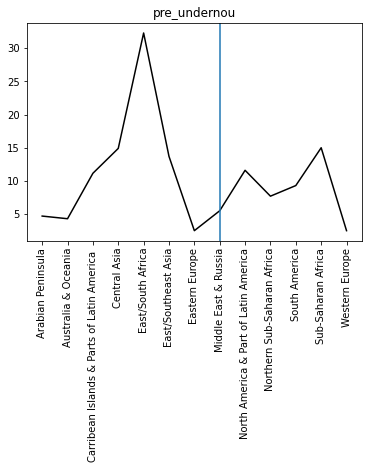

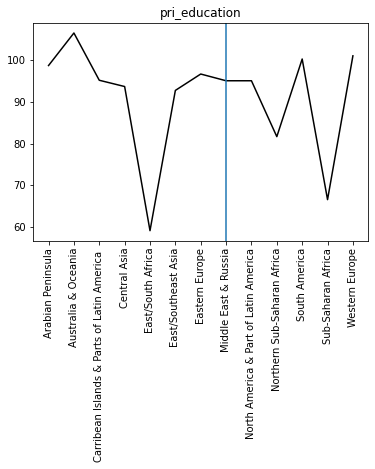

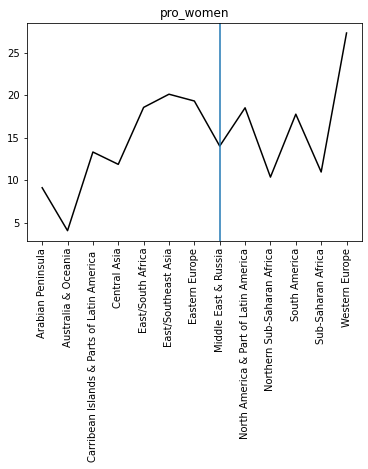

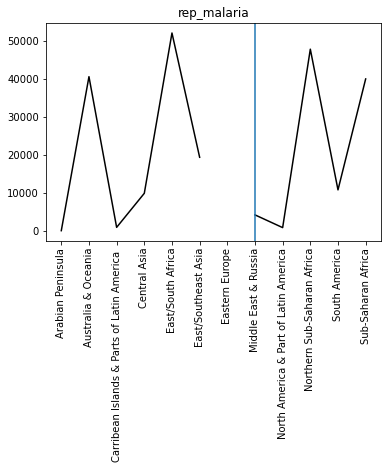

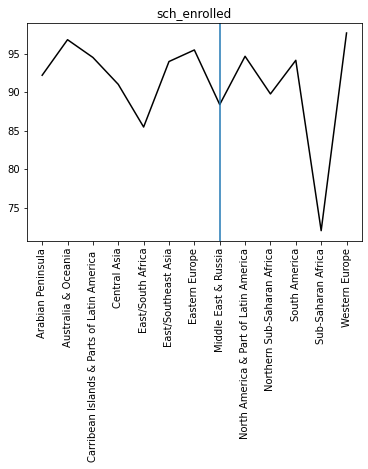

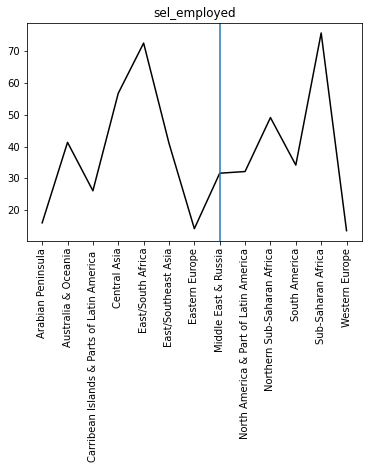

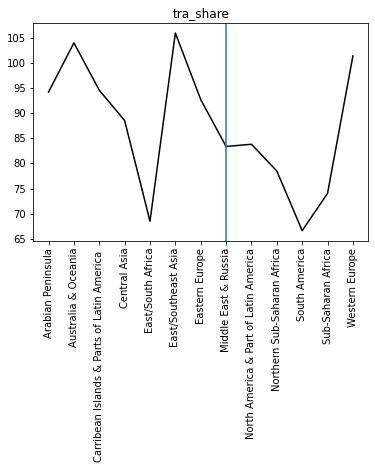

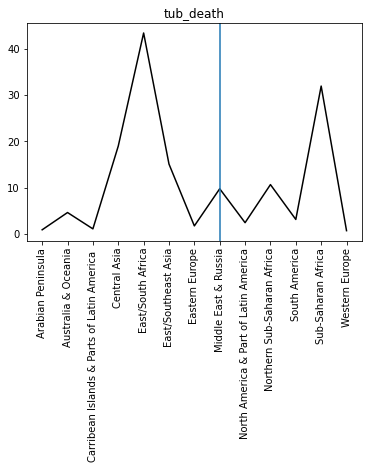

In [19]:
# create new variable and group per region
region_pre = dataset.groupby('reg').median().round(decimals = 2).copy()

# drop world from region_group for analysis purposes
region_group = region_pre.drop(index='World')
                  
# selecting columns
region_group  = region_group.iloc[: , :41]

# plot graph for all features comparing feature groups 
for col in region_group:

    plt.title(col)                                #getting title name from column name
    plt.plot(region_group[[col]], color ='black') #creating plot according to each col
    plt.xticks(rotation = 'vertical')             #turning region labels vertical to prevent overlapping
    plt.axvline(x="Middle East & Russia")         #marking our region
    plt.show()                                    #displaying plot

In [20]:
# printing all averages for selected features to compare among all regions
print(region_group[["pre_care"]])
print(region_group[["emp_m"]])
print(region_group[["cov_staff"]])
print(region_group[["fer_rate"]])
print(region_group[["mat_death"]])
print(region_group[["net_oda"]])


                                             pre_care
reg                                                  
Arabian Peninsula                               97.00
Australia & Oceania                             99.50
Carribean Islands & Parts of Latin America      99.75
Central Asia                                    85.40
East/South Africa                               94.05
East/Southeast Asia                             91.88
Eastern Europe                                  99.90
Middle East & Russia                            46.00
North America & Part of Latin America           91.95
Northern Sub-Saharan Africa                     83.30
South America                                   91.05
Sub-Saharan Africa                              86.90
Western Europe                                  99.80
                                             emp_m
reg                                               
Arabian Peninsula                            69.02
Australia & Oceania                  

## Analyzing by Feature Groups

### Categorizing Features into Groups

We have looked at all the columns in our cleaned data set and tried to non-technically try to put them in groups.
The following shows the features in categories:

In [21]:
# grouping features to groups and assigning new dataframes
mir_disease = mir_dropped[["aid_death_est", "inc_tuberculosis", "tub_death", "pre_hiv", "pre_undernou"]]
mir_health = mir_dropped[["cov_aviral", "imp_sanitation", "imp_water", "imm_measles"]]
mir_employment = mir_dropped[["emp_f", "emp_m", "emp_t", "con_emp_f", "con_emp_m", "con_emp_t", "sel_employed"]]
mir_wealth = mir_dropped[["gnp_employed", "gnp_energy", "gni_capita", "net_oda", "ene_gdp", "tra_share"]]
mir_etc = mir_dropped[["pri_education", "int_user", "mob_subscribe", "co2_pcap", "pro_women"]]

# grouping all feature groups together to a list
feature_groups = [[mir_disease], 
                  [mir_health],
                  [mir_employment],
                  [mir_wealth],
                  [mir_etc]]

# creating a visual table for the feature groups
from astropy.table import QTable,Table,Column # importing astropy.table to visualize table

# inputting content for the table visual 
Tabl = [{'Diseases / Poverty':"AIDS estimated deaths (UNAIDS estimates)",
         'Health Provided':"Antiretroviral therapy coverage (% of people living with HIV)",
         'Employment':"Contributing family workers, female (% of female employment)",
         'Country financials / wealth': "GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)",
         'Other Features':"Primary completion rate, total (% of relevant age group)"},
        {'Diseases / Poverty':"Incidence of tuberculosis (per 100,000 people)",
         'Health Provided':"Improved sanitation facilities (% of population with access)",
         'Employment':"Contributing family workers, male (% of male employment)",
         'Country financials / wealth':"GNI per capita, Atlas method (current US$)",
         'Other Features':"Internet users (per 100 people)"},
        {'Diseases / Poverty':"Tuberculosis death rate (per 100,000 people), including HIV",
        'Health Provided':"Improved water source (% of population with access)",
         'Employment':"Contributing family workers, total (% of total employment)",
         'Country financials / wealth':"Trade (% of GDP)",
         'Other Features':"Mobile cellular subscriptions (per 100 people)"},
        {'Diseases / Poverty':"Prevalence of HIV, total (% of population ages 15-49)",
         'Health Provided':"Immunization, measles (% of children ages 12-23 months)",
         'Employment':"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",
         'Country financials / wealth':"Net ODA received per capita (current US$)",
          'Other Features':"CO2 emissions (metric tons per capita)"},
         {'Diseases / Poverty':"Prevalence of undernourishment (% of population)",
          'Employment':"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",
          'Country financials / wealth':"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",
          'Other Features':"Proportion of seats held by women in national parliaments (%)"},
          {'Employment':"Employment to population ratio, 15+, total (%) (modeled ILO estimate)"},
          {'Employment': "Self-employed, total (% of total employment)"}]
             
t = Table(rows = Tabl)
t #@ OUTPUTTING table

Country financials / wealth,Diseases / Poverty,Employment,Health Provided,Other Features
str73,str59,str70,str61,str61
GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),AIDS estimated deaths (UNAIDS estimates),"Contributing family workers, female (% of female employment)",Antiretroviral therapy coverage (% of people living with HIV),"Primary completion rate, total (% of relevant age group)"
"GNI per capita, Atlas method (current US$)","Incidence of tuberculosis (per 100,000 people)","Contributing family workers, male (% of male employment)",Improved sanitation facilities (% of population with access),Internet users (per 100 people)
Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV","Contributing family workers, total (% of total employment)",Improved water source (% of population with access),Mobile cellular subscriptions (per 100 people)
Net ODA received per capita (current US$),"Prevalence of HIV, total (% of population ages 15-49)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Immunization, measles (% of children ages 12-23 months)",CO2 emissions (metric tons per capita)
"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Prevalence of undernourishment (% of population),"Employment to population ratio, 15+, male (%) (modeled ILO estimate)",--,Proportion of seats held by women in national parliaments (%)
--,--,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",--,--
--,--,"Self-employed, total (% of total employment)",--,--


### Choosing Feature Group to Analyze

Below, we have plotted the data for each of these groups. Each line represents a column/feature and the countries of our region are displayed in the x-axis. While the parameters in the y-axis is different for all, all we need to see is that the lines are steady without moving too far up or down, which would indicate the values differ a lot for different countries. 

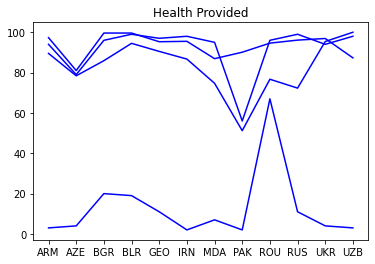

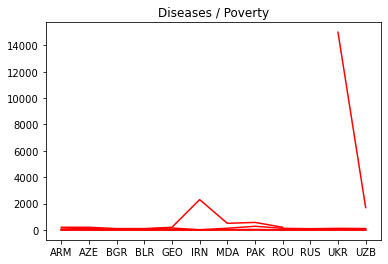

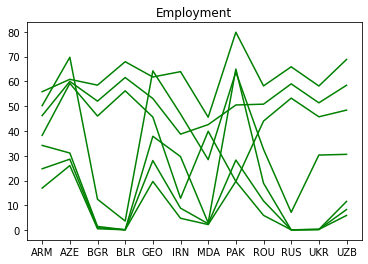

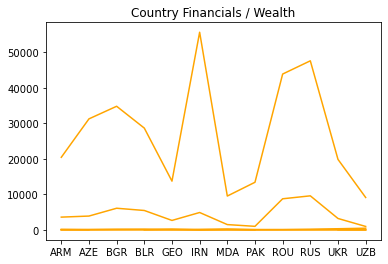

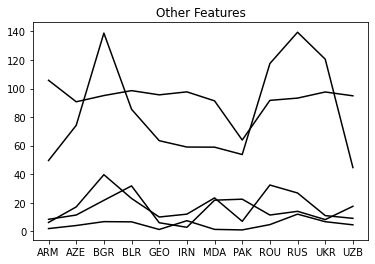

In [22]:
# create plot to compare feature "Health Provided" among our region
plt.title('Health Provided')
plt.plot(mir_health, color ='blue')
plt.show() 

# create plot to compare feature "Diseases / Poverty" among our region
plt.title('Diseases / Poverty')
plt.plot(mir_disease, color ='red')
plt.show()

# create plot to compare feature "Employment" among our region
plt.title('Employment')
plt.plot(mir_employment, color ='green')
plt.show()

# create plot to compare feature "Country Financials / Wealth" among our region
plt.title('Country Financials / Wealth')
plt.plot(mir_wealth, color ='orange')
plt.show()

# create plot to compare feature "Other Features" among our region
plt.title('Other Features')
plt.plot(mir_etc, color ='black')
plt.show()



<b>Observations</b><br>
Compared to other feature groups, "Diseases / Poverty" have a steady trend for all countries with the exception of one outlier.
Thus, we will be looking into this group for this part of the analysis.

### Analyzing - "Diseases / Poverty " 

#### "AIDS Estimated Deaths"

<function matplotlib.pyplot.show(close=None, block=None)>

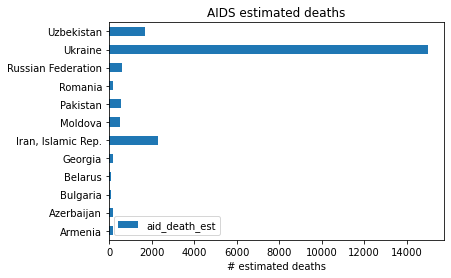

In [23]:
# creating bar chart to examine feature "AIDS estimated deaths" per country
mir.plot('cou', 'aid_death_est', kind ='barh') # setting-up plot data, making bar horizontal

plt.title(label = 'AIDS estimated deaths') # creating title
plt.xlabel(xlabel = '# estimated deaths')  # creating label for x-axis
plt.ylabel(ylabel = '')                    # delete/overwrite label for y-axis

plt.show                                   # outputting plot

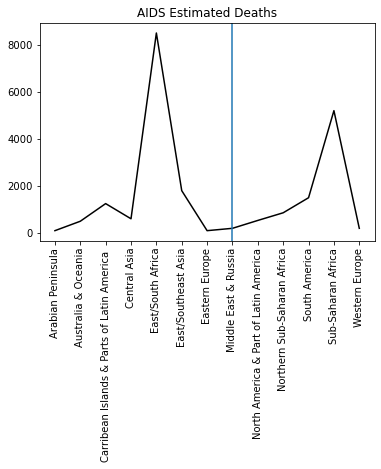

In [24]:
# plot graph to compare of region groups by feature
plt.title('AIDS Estimated Deaths')                        # set title
plt.plot(region_group[['aid_death_est']], color ='black') # select data
plt.xticks(rotation = 'vertical')                         # rotate x-axis labels
plt.axvline(x="Middle East & Russia")                     # highlight our region
plt.show()                                                # display graph

#### "Incidences of Tuberculosis (per 100,000 People)"

<function matplotlib.pyplot.show(close=None, block=None)>

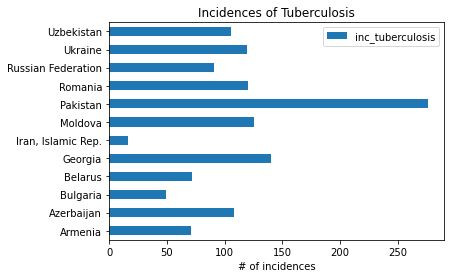

In [25]:
# creating bar chart to examine feature "Incidences of Tuberculosis"
mir.plot('cou', 'inc_tuberculosis', kind ='barh')

plt.title(label = "Incidences of Tuberculosis")
plt.xlabel(xlabel = '# of incidences')
plt.ylabel(ylabel = '')

plt.show

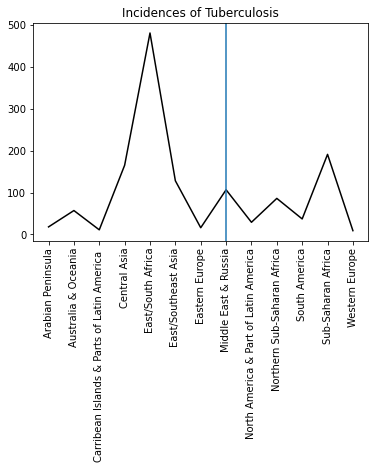

In [26]:
# plot graph to compare of region groups by feature
plt.title('Incidences of Tuberculosis')
plt.plot(region_group[['inc_tuberculosis']], color ='black')
plt.xticks(rotation = 'vertical')
plt.axvline(x="Middle East & Russia")
plt.show()

#### "Tuberculosis Death Rate"

<function matplotlib.pyplot.show(close=None, block=None)>

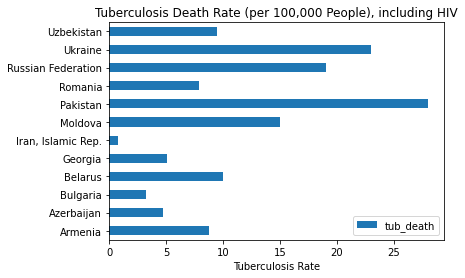

In [27]:
mir.plot('cou', 'tub_death', kind ='barh')

plt.title(label = 'Tuberculosis Death Rate (per 100,000 People), including HIV')
plt.xlabel(xlabel = 'Tuberculosis Rate')
plt.ylabel(ylabel = '')

plt.show

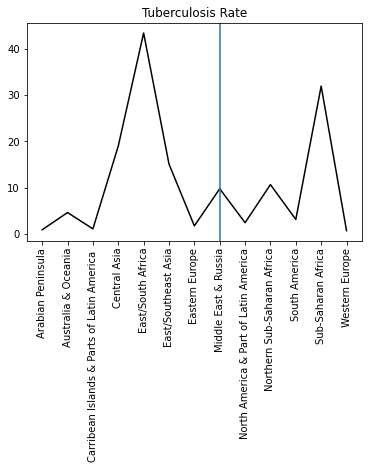

In [28]:
# plot graph to compare of region groups by feature
plt.title('Tuberculosis Rate')
plt.plot(region_group[['tub_death']], color ='black')
plt.xticks(rotation = 'vertical')
plt.axvline(x="Middle East & Russia")
plt.show()

#### Prevalence of HIV

<function matplotlib.pyplot.show(close=None, block=None)>

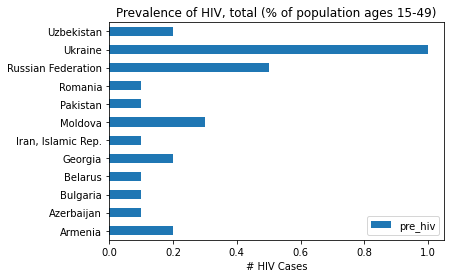

In [29]:
mir.plot('cou', 'pre_hiv', kind ='barh')

plt.title(label = 'Prevalence of HIV, total (% of population ages 15-49)')
plt.xlabel(xlabel = '# HIV Cases')
plt.ylabel(ylabel = '')

plt.show

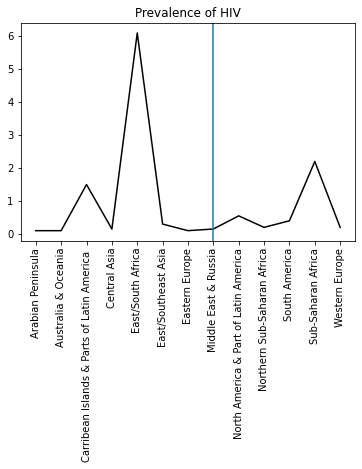

In [30]:
# plot graph to compare of region groups by feature
plt.title('Prevalence of HIV')
plt.plot(region_group[['pre_hiv']], color ='black')
plt.xticks(rotation = 'vertical')
plt.axvline(x="Middle East & Russia")
plt.show()

#### Prevalence of Undernourishment

<function matplotlib.pyplot.show(close=None, block=None)>

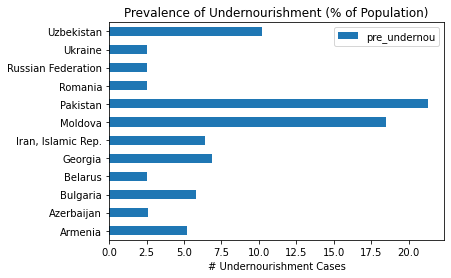

In [31]:
mir.plot('cou', 'pre_undernou', kind ='barh')

plt.title(label = 'Prevalence of Undernourishment (% of Population)')
plt.xlabel(xlabel = '# Undernourishment Cases')
plt.ylabel(ylabel = '')

plt.show

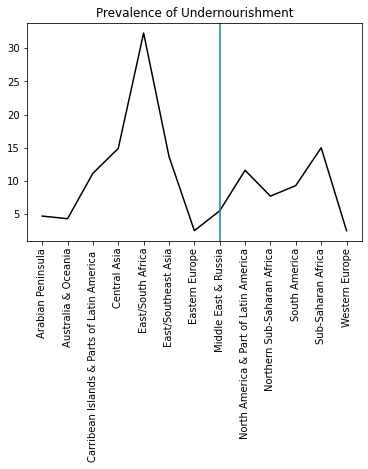

In [32]:
# plot graph to compare of region groups by feature
plt.title('Prevalence of Undernourishment')
plt.plot(region_group[['pre_undernou']], color ='black')
plt.xticks(rotation = 'vertical')
plt.axvline(x="Middle East & Russia")
plt.show()

# Conclusion

## Representative Country

By calculating, we conclude that the country that best represents our given region is Armenia. We have eliminated countries by increasing factor for the standard deviation so that only the country closest to the mean is left to represent our region. However, it has to be noted that our selection bases only on calculating with data from the World Bank dataset and relies on its accuracy. Furthermore, it disregards any non-technical research about the region that was conducted prior to the calculation.

## Representative 5 Features

After looking at all the regional features with respect to other regions, we selected the following 5 feature to best represent our region:<br>
- Pregnant women receiving prenatal care (%)
- Maternal mortality ratio (modeled estimate, per 100,000 live births)
- Births attended by skilled health staff (% of total)
- Fertility rate, total (births per woman)
- Net ODA received per capita (current US$)

Interesting is the fact that four out of five features are concerning healthcare. Unfortunately, this is not due to the fact that the healthcare in our region is positive but mostly negative. While the number of skilled staff for births is high, the percentage of prenatal care coverage is at a scandalous half value compared to the second worst region in the world. Furthermore, the maternal mortality ratio and fertility rate are among the lowest in the world. The fertility rate is at 1.74 while the world average is 2.83 and African regions average at above 4.0. These numbers are comparable to European regions (1.77 & 1.51) and East/Southeast Asia (1.96) with a similar trend. There are several theories and researches for this phenomenon. One prominent theory is that young adults postpone having children to enjoy their own lives with the result of infertility at a later stage of life (Sobotka, 2017).

Finally, the net oda, which stands for official development assistance, is the world lowest number. This is due to the fact that some countries in our region pull the average down despite Afghanistan and Georgia have relatively high numbers being ranked in the top 30 in this category. 

### Representative Feature Group

As an additional analysis, we compared different groups that consist of features with the same theme such as financial wealth, disease/poverty, or employment. The comparison resulted with a similar finding as in 4.2 that healthcare is a dominant theme for our region. Thus, the representative feature group is the group including features about diseases and poverty.



## Obscure Findings

Lastly, some obscure findings have to be mentioned. A rough examination of the metadata lead to the conclusion that the sources underlying the dataset is not consistent. Several columns that cite the time of when the data was collected show that there are huge discrepancies. This is compliant with an article by Banerjee et al. who suggest that because data is sourced from many different organizations and departments from different times, accuracy is being affected (2006). This has major influence on the accuracy of this analysis as it relies on data only. 

Another finding is that there is no consistency in parameters disregarding time and missing data. In a globalized world with several globally influential organizations such as the UN, data is still collected looking at different ratios and using different units. In a modern world, there should be a standard for all countries shared through governments how to collect and evaluate data. Examining our dataset lead to the conclusion that the population and per X people ratios can influence data a lot. Absolute counts such as 'reported malaria cases' should be always in relation to the population.

Difficult for the selection of our subset was that our region spreads into three different continents. Some countries are part of the EU, some are in Central Asia, Russia is almost a continent by itself, and Iran is located in a region that feels like another world in comparison. Therefore, cultural and traditional differences exit that are represented in the underlying data.

# References

- Adams, L. L. (2010). The spectacular state: Culture and national identity in Uzbekistan. Duke University Press.
- Banerjee, A. V., Deaton, A., Lustig, N., Rogoff, K., & Hsu, E. (2006). An evaluation of World Bank research, 1998-2005. Available at SSRN 2950327.
- Bell, J. D. (2019). Bulgaria in transition: Politics, economics, Society, and culture after communism. Routledge.
- Gulwani, N. (2017, December 23). 13 Things You Should Know About Pakistani Culture. Retrieved November 09, 2020, from 
- Johnson, S. D. (1992). Anti-Arabic prejudice in “middletown”. Psychological Reports, 70(3), 811-818.

- Malakoutikhah, Z. (2020). Iran: Sponsoring or combating terrorism?. Studies in Conflict & Terrorism, 43(10), 913-939.
https://theculturetrip.com/asia/pakistan/articles/13-things-you-should-know-about-pakistani-culture/

- Sobotka, T. (2017). Post-transitional fertility: the role of childbearing postponement in fuelling the shift to low and unstable fertility levels. Journal of biosocial science, 49(S1), S20-S45.
- Tismaneanu, V. (2016). The new tsar: the rise and reign of Vladimir Putin. By Steven Lee Myers.
- United Nations Statistics Division - Demographic and Social Statistics. (n.d.). Retrieved November 11, 2020, from https://unstats.un.org/unsd/demographic/sources/census/alternativecensusdesigns.htm
